<a href="https://colab.research.google.com/github/kirangang/ML_Projects/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

**Project Type** - Unsupervised

**Contribution** - Individual

# **Project Summary -**

# **GitHub Link -**

https://github.com/kirangang/ML_Projects

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, we are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px


# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from collections import Counter

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset to be analysed
data = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Shows first 5 rows
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Shows last 5 rows
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

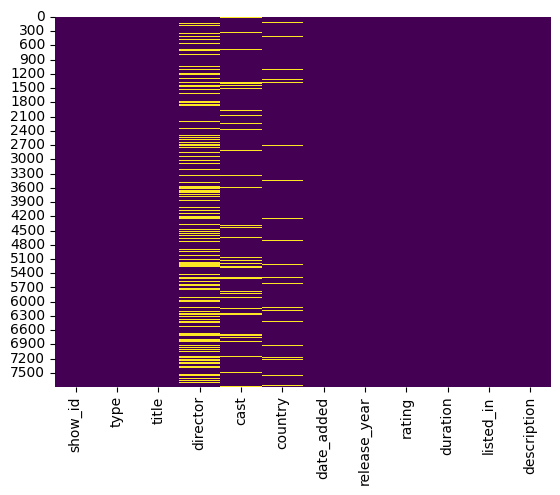

In [10]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

### What did you know about your dataset?

* The above dataset is about Netflix Movies and TV Shows Clustering, where our task is to examine the dataset, build the clustering methods and content based recommendation system.
* The dataset has 7787 rows and 12 columns.
* There are no duplicate rows present in the dataset.
* There are some null values present in the columns director, cast, country, date_added and rating.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Describe numerical variables
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [13]:
# Describe categorical variables
data.describe(include=['object','category'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

### Variables Description

**1. show_id :** Unique ID for every Movie / TV Show

**2. type :** Identifier - A Movie or TV Show

**3. title :** Title of the Movie / TV Show

**4. director :** Director of the Movie / Show

**5. cast :** Actors involved in the Movie / Show

**6. country :** Country where the Movie / Show was produced

**7. date_added :** Date it was added on Netflix

**8. release_year :** Actual release year of the Movie / Show

**9. rating :** TV Rating of the Movie / Show

**10. duration :** Total duration in minutes or number of seasons

**11. listed_in :** Genre

**12. description:** The Summary description

## 3. ***Data Preparation and Cleaning***

In [15]:
# Creating a copy of our dataset
df = data.copy()

### Handling missing values

In [16]:
# Checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [17]:
# Handling missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df.dropna(subset=['date_added','rating'], axis=0, inplace=True)

Since there are lots of missing values present in the 'director', 'cast' and 'country' columns, we will fill those null values with word Unknown.
The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset.

In [18]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we can see that there are no null values present in our dataset.

In [19]:
df.shape

(7770, 12)

## Changing data type of date_added column from string to datetime format

In [20]:
# Strip leading and trailing spaces from the 'date_added' column
df['date_added'] = df['date_added'].str.strip()

In [21]:
# Typecasting 'date_added' from string to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [22]:
df.shape

(7770, 14)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  month_added   7770 non-null   int32         
 13  year_added    7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1

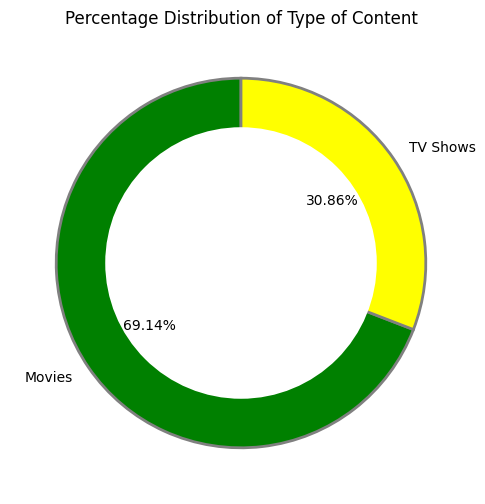

In [24]:
# Chart - 1 visualization code

plt.figure(figsize=(10, 6))
my_colors = ['green', 'yellow']
labels = ['Movies', 'TV Shows']

# Set title with black font color
plt.title('Percentage Distribution of Type of Content', color='black')

# Plot pie chart with black font color for percentage labels
plt.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', startangle=90, colors=my_colors, wedgeprops={'edgecolor': 'gray', 'linewidth': 2.0}, textprops={'color': 'black'})

# Draw a white circle at the center to create the hole
centre_circle = plt.Circle((0, 0), 0.73, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


### Chart - 2

In [25]:
# Chart - 2 visualization code

# Create a DataFrame to store year values and counts
years_df = df['year_added'].value_counts().reset_index()

# Rename the columns to "year" and "count"
years_df.columns = ['year', 'count']

# Sort years in ascending order
years_df.sort_values('year', inplace=True)

# Create a bar chart
fig = px.bar(years_df, x="year", y="count", text="count", color='count',
             color_continuous_scale='viridis')

# Update layout
fig.update_layout(
    title='Year-wise Addition of Content on Netflix',
    xaxis_title='Year',
    yaxis_title='Count',
    width=1000,
    height=500,
    showlegend=False,
    title_x=0.5,  # Set title's horizontal position to the center
    xaxis=dict(type='category')  # Set x-axis type to 'category' for continuous display
)

# Show the plot
fig.show()

### Chart - 3

In [26]:
# Chart - 3 visualization code
import plotly.graph_objects as go

tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker_color='#ffd700', line=dict(width=4)))
fig.add_trace(go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker_color='#008000', line=dict(width=4)))

fig.update_layout(title="Type of content added over the years", title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h"))

fig.show()


### Chart - 4

In [31]:
# Chart - 4 visualization code

import calendar

# Count the occurrences of each month
month_counts = df['month_added'].value_counts().reset_index()

# Rename the columns
month_counts.columns = ['month', 'count']

# Sort the DataFrame by month index
month_counts = month_counts.sort_values(by='month')

# Convert month index to month names
month_counts['month'] = month_counts['month'].astype(int)
month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_name[x])

# Create a bar chart
fig = px.bar(month_counts, x="month", y="count", text="count", color='count',
             color_continuous_scale='cividis')

# Update layout
fig.update_layout(
    title='Month-wise Addition of Content on Netflix',
    xaxis_title='Month',
    yaxis_title='Count',
    width=1000,
    height=500,
    showlegend=False,
    title_x=0.5,
)

# Show the plot
fig.show()


### Chart - 5

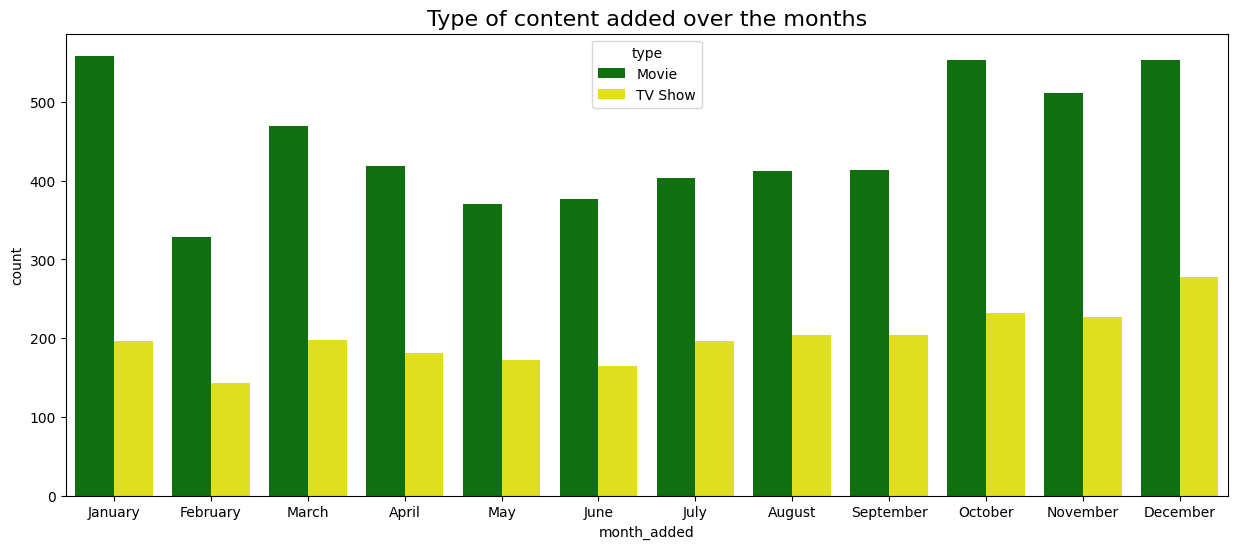

In [32]:
# Chart - 5 visualization code
import calendar

# Count the occurrences of each month
month_counts = df['month_added'].value_counts().reset_index()

# Rename the columns
month_counts.columns = ['month', 'count']

# Sort the DataFrame by month index
month_counts = month_counts.sort_values(by='month')

# Convert month index to month names
month_counts['month'] = month_counts['month'].astype(int)
month_counts['month'] = month_counts['month'].apply(lambda x: calendar.month_name[x])

# Create the countplot with specified colors
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='month_added', hue='type', lw=5, data=df, ax=ax, palette={'Movie': 'green', 'TV Show': 'yellow'})

# Set x-axis ticks and labels
ax.set_xticks(range(len(month_counts)))
ax.set_xticklabels(month_counts['month'])

# Set the title
plt.title('Type of content added over the months', fontsize=16)

# Show the plot
plt.show()


### Chart - 6

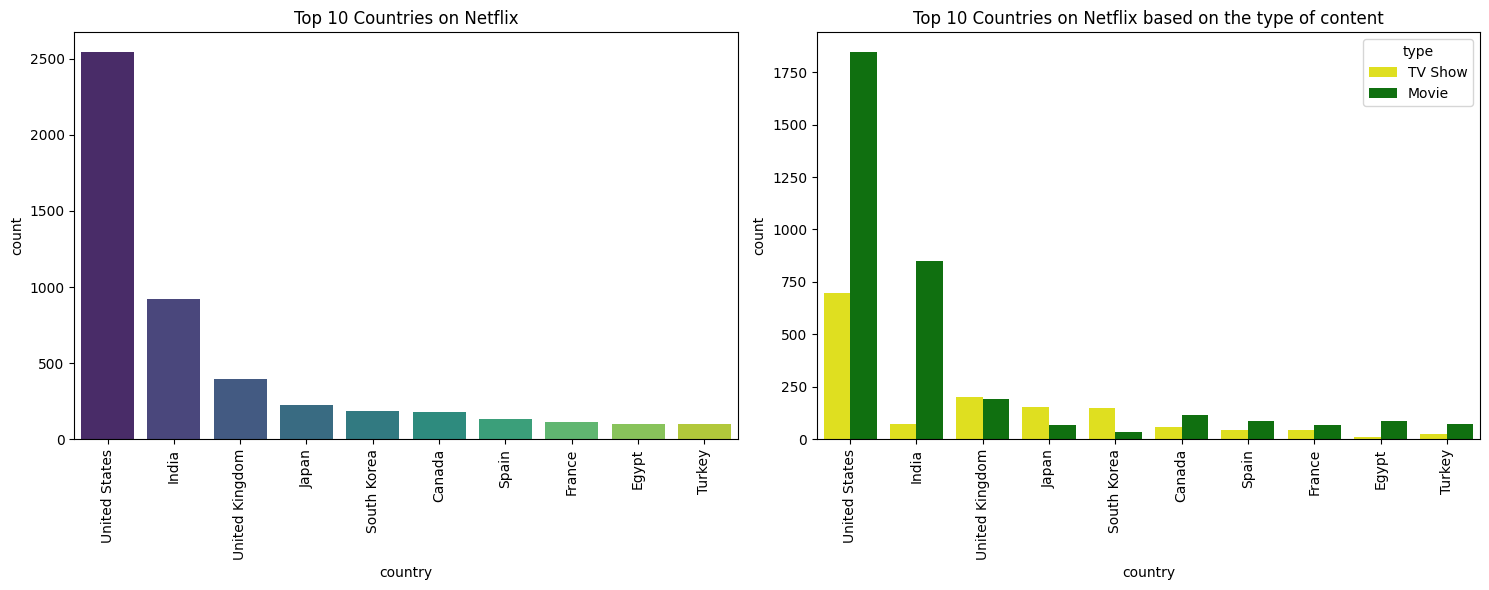

In [33]:
# Chart - 6 visualization code

# Filter out rows with 'Unknown' country
filtered_df = df[df['country'] != 'Unknown']

# Define a color palette dictionary
color_palette = {'Movie': 'green', 'TV Show': 'yellow'}

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for the first subplot - Top 10 Countries on Netflix
sns.countplot(
    x="country",                                      # x-axis variable (countries)
    data=filtered_df,                                 # DataFrame containing the filtered data
    order=filtered_df['country'].value_counts().index[:10],  # Order the countries by count, showing only the top 10
    palette='viridis',                                # Using a color palette
    ax=axes[0]                                        # Specify the first subplot axes
)

# Rotate x-axis labels for better readability
axes[0].tick_params(axis='x', rotation=90)

axes[0].set_title('Top 10 Countries on Netflix')

# Plot for the second subplot - Top 10 Countries on Netflix based on the type of content
sns.countplot(
    x="country",                                      # x-axis variable (countries)
    data=filtered_df,                                 # DataFrame containing the filtered data
    hue='type',                                       # Categorical variable to differentiate by color (type)
    order=filtered_df['country'].value_counts().index[:10],  # Order the countries by count, showing only the top 10
    palette=color_palette,                            # Assigning specific colors based on the type
    ax=axes[1]                                        # Specify the second subplot axes
)

# Rotate x-axis labels for better readability
axes[1].tick_params(axis='x', rotation=90)

axes[1].set_title('Top 10 Countries on Netflix based on the type of content')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Display the plot
plt.show()


### Chart - 7

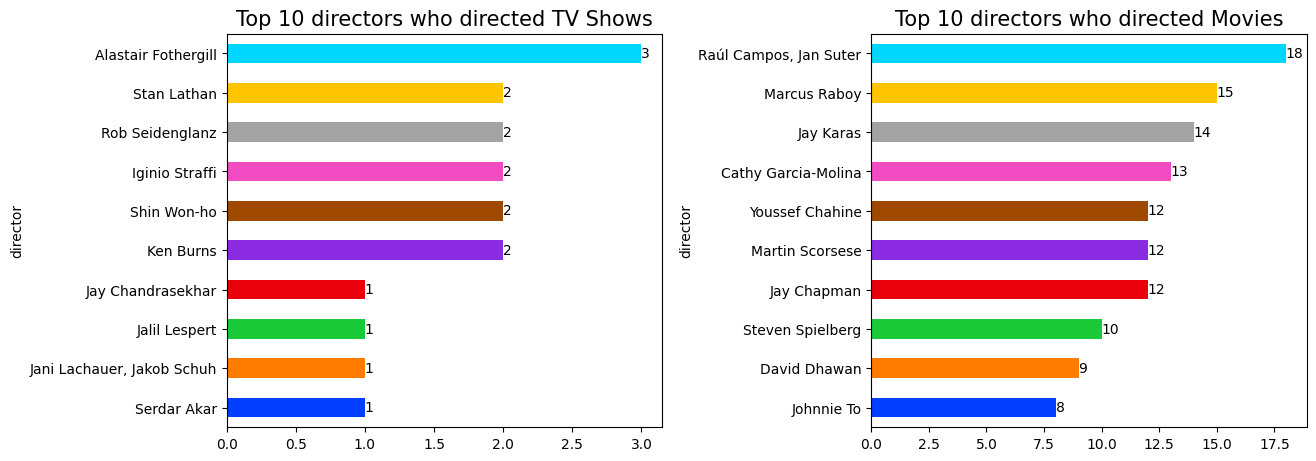

In [34]:
# Chart - 7 visualization code

# Filter out rows with 'Unknown' director for TV shows and movies
filtered_tv_shows = df[(df['type'] == 'TV Show') & (df['director'] != 'Unknown')]
filtered_movies = df[(df['type'] == 'Movie') & (df['director'] != 'Unknown')]

# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot top 10 directors for TV shows with different colors and count on top
tv_shows_directors = filtered_tv_shows['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(tv_shows_directors))
tv_shows = tv_shows_directors.plot(kind='barh', ax=ax[0], color=colors)
tv_shows.set_title('Top 10 directors who directed TV Shows', size=15)
for index, value in enumerate(tv_shows_directors.values):
    tv_shows.text(value, index, str(value), ha='left', va='center')

# Plot top 10 directors for movies with different colors and count on top
movies_directors = filtered_movies['director'].value_counts().head(10).sort_values(ascending=True)
colors = sns.color_palette('bright', n_colors=len(movies_directors))
movies = movies_directors.plot(kind='barh', ax=ax[1], color=colors)
movies.set_title('Top 10 directors who directed Movies', size=15)
for index, value in enumerate(movies_directors.values):
    movies.text(value, index, str(value), ha='left', va='center')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


### Chart - 8

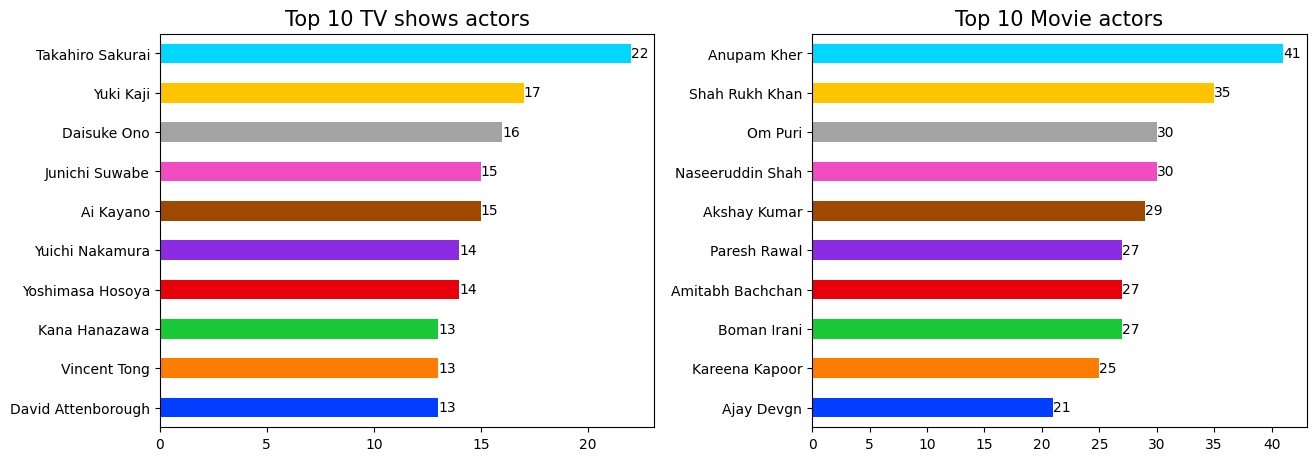

In [35]:
# Chart - 8 visualization code

# Filter out rows with 'Unknown' cast for TV shows and movies
filtered_tv_shows = df[(df['type'] == 'TV Show') & (~df['cast'].str.contains('Unknown', na=False))]
filtered_movies = df[(df['type'] == 'Movie') & (~df['cast'].str.contains('Unknown', na=False))]

# Create subplots with specified figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot top 10 TV show actors with different colors and count on top
top_TVshows_actor = filtered_tv_shows['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor_counts = top_TVshows_actor.value_counts().head(10).sort_values(ascending=True)  # Modified
colors = sns.color_palette('bright', n_colors=len(top_TVshows_actor_counts))
a = top_TVshows_actor_counts.plot(kind='barh', ax=ax[0], color=colors)
a.set_title('Top 10 TV shows actors', size=15)
for index, (value, count) in enumerate(top_TVshows_actor_counts.items()):
    a.text(count, index, str(count), ha='left', va='center')

# Plot top 10 movie actors with different colors and count on top
top_movie_actor = filtered_movies['cast'].str.split(', ', expand=True).stack()
top_movie_actor_counts = top_movie_actor.value_counts().head(10).sort_values(ascending=True)  # Modified
colors = sns.color_palette('bright', n_colors=len(top_movie_actor_counts))
b = top_movie_actor_counts.plot(kind='barh', ax=ax[1], color=colors)
b.set_title('Top 10 Movie actors', size=15)
for index, (value, count) in enumerate(top_movie_actor_counts.items()):
    b.text(count, index, str(count), ha='left', va='center')

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


### Chart - 9

In [47]:
# Chart - 9 visualization code

top_10_Genre = df['listed_in'].value_counts().head(10)

fig = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=22, color='#3A3B3C', family="Lato, sans-serif"),
                   font=dict(size=12, color='#000000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig.show()



### Chart - 10

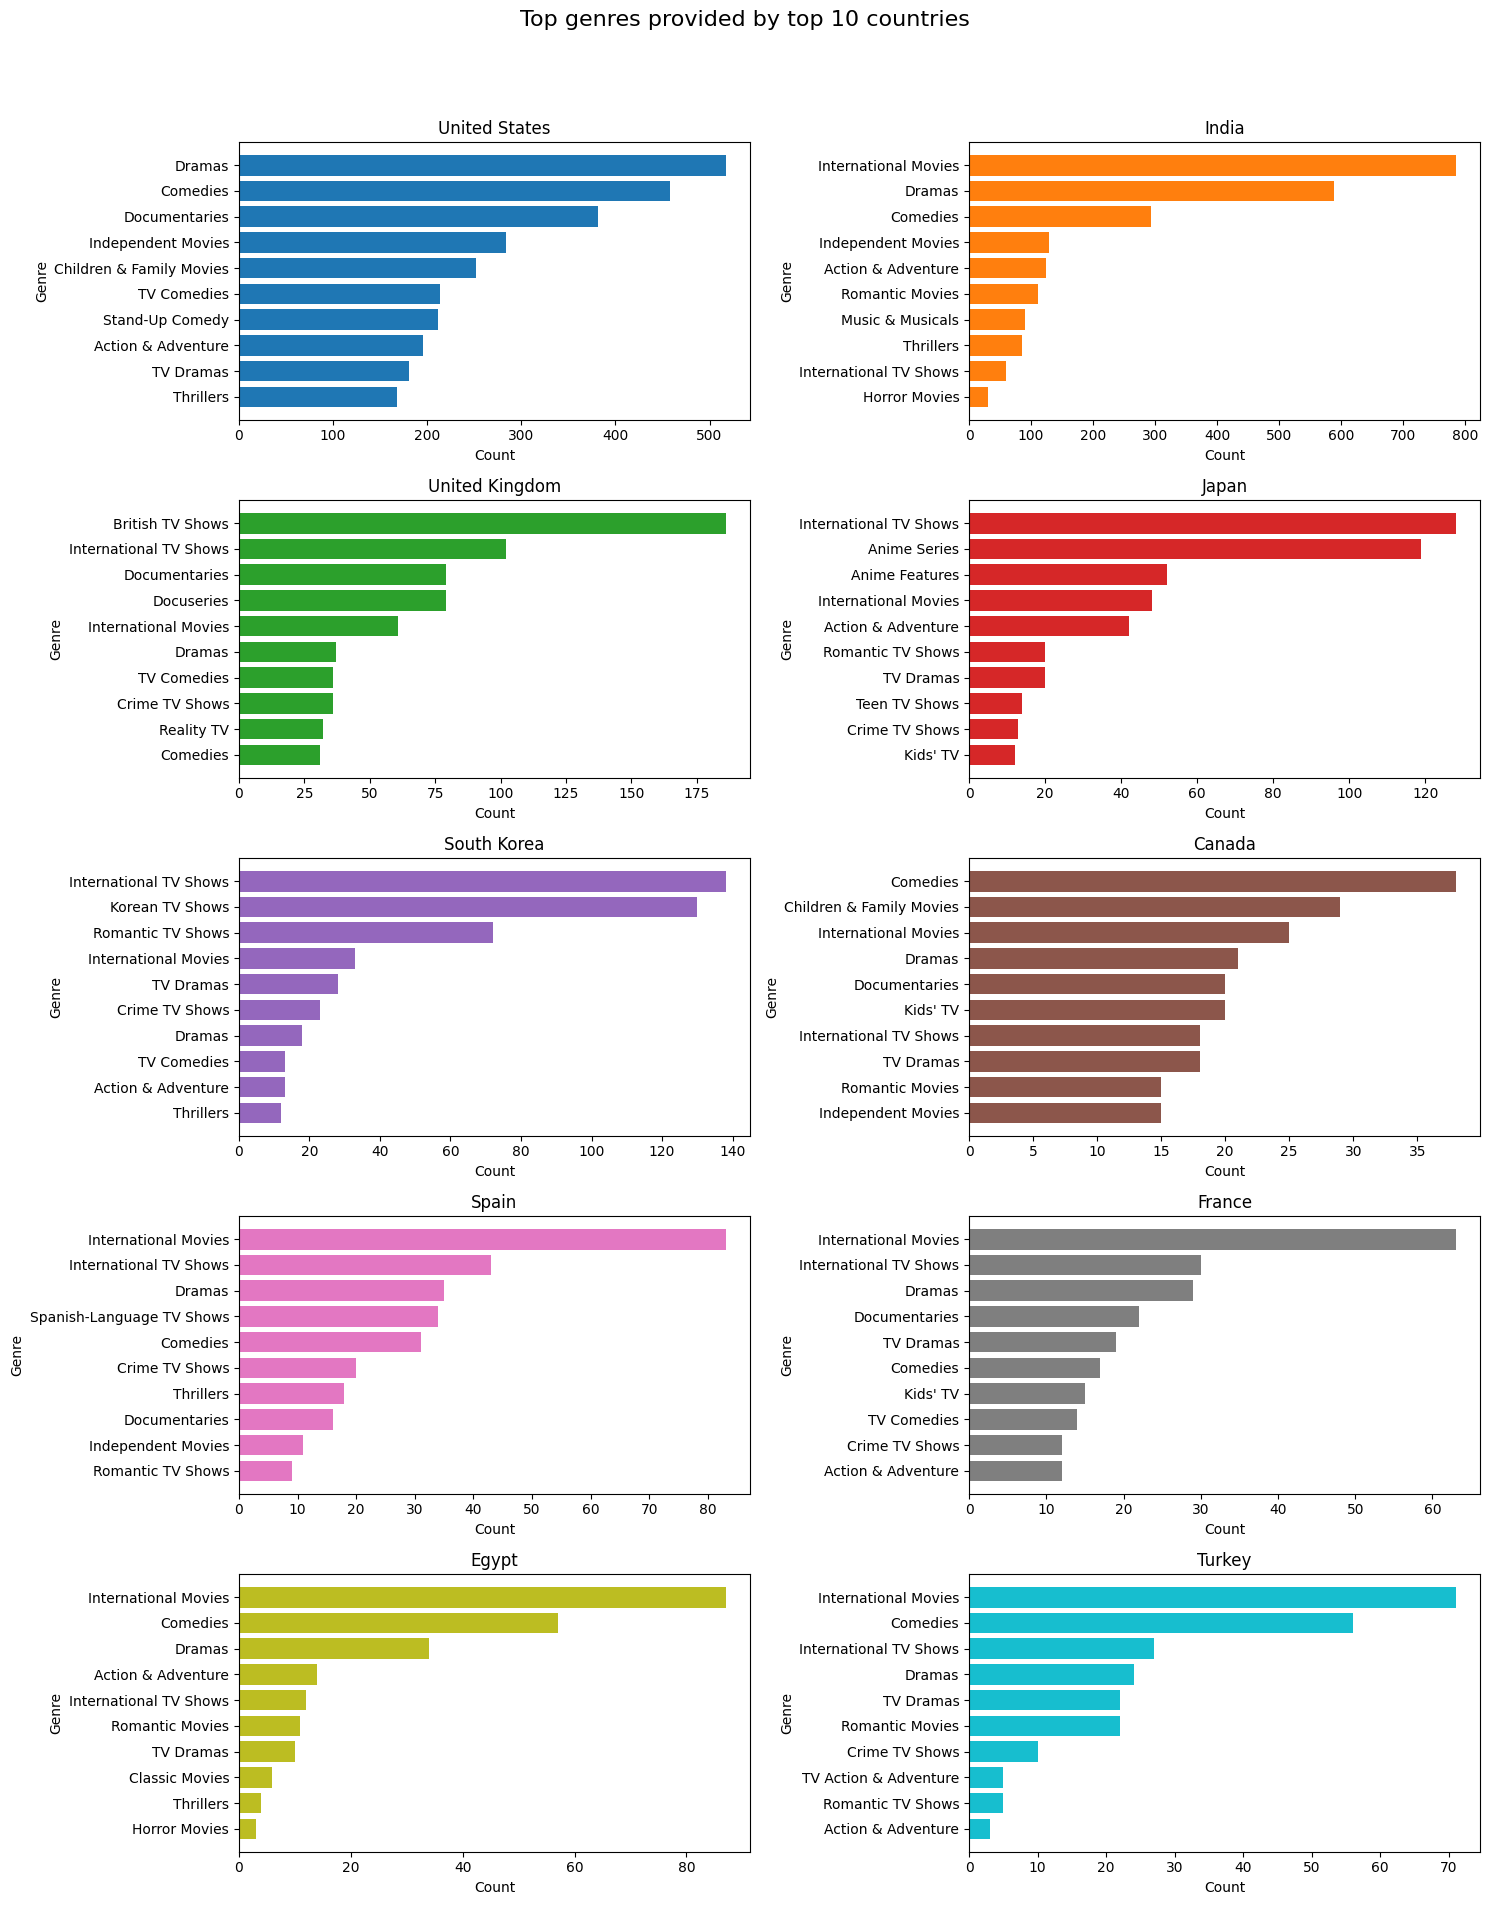

In [48]:
# Chart - 10 visualization code

# Filter out rows where country is 'Unknown'
df_filtered = df[df['country'] != 'Unknown']

# Function to extract top genres and their counts for a specific country
def top_genre_by_country(df, country):
    # Filter data for the specified country
    country_df = df[df['country'] == country]
    # Count the occurrences of each genre and get the top 10
    genre_counter = Counter(", ".join(country_df['listed_in']).split(", ")).most_common(10)
    # Reverse the order to have the most watched genre first
    genre = [val[0] for val in genre_counter][::-1]
    count = [val[1] for val in genre_counter][::-1]
    return genre, count

# Find top 10 countries based on frequency (excluding 'Unknown')
top_countries = df_filtered['country'].value_counts().head(10).index.tolist()

# Define colors for each country
colors = plt.cm.tab10(np.linspace(0, 1, len(top_countries)))

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Top genres provided by top 10 countries', fontsize=16)

# Flatten the axes for easier iteration
axs = axs.flatten()

# Plot each country's top genres
for i, country in enumerate(top_countries):
    genre, count = top_genre_by_country(df_filtered, country)
    ax = axs[i]
    ax.barh(genre, count, color=colors[i])
    ax.set_title(country)
    ax.set_xlabel('Count')
    ax.set_ylabel('Genre')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Chart - 11

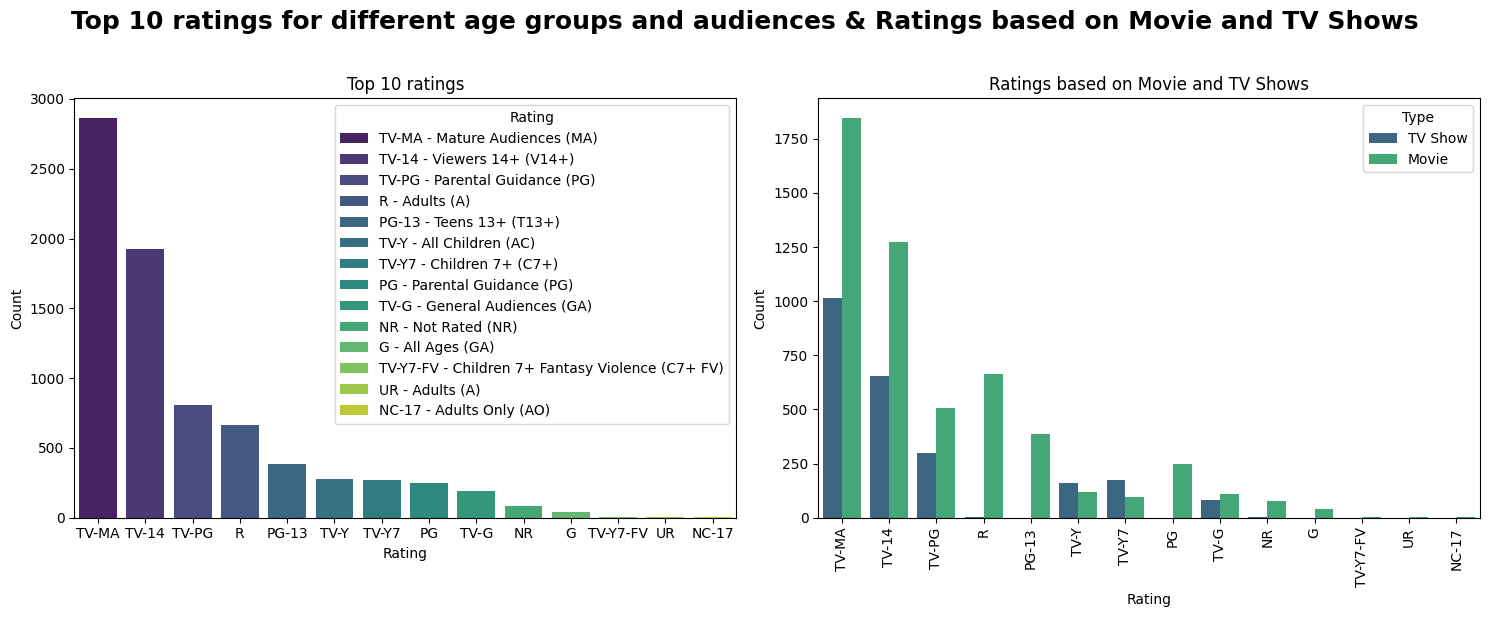

In [51]:
# Chart - 11 visualization code

# Order of ratings based on their frequency
order = df['rating'].value_counts().index

# Rating mapping to categories
rating_categories = {
    'TV-MA': 'TV-MA - Mature Audiences (MA)',
    'R': 'R - Adults (A)',
    'PG-13': 'PG-13 - Teens 13+ (T13+)',
    'TV-14': 'TV-14 - Viewers 14+ (V14+)',
    'TV-PG': 'TV-PG - Parental Guidance (PG)',
    'NR': 'NR - Not Rated (NR)',
    'TV-G': 'TV-G - General Audiences (GA)',
    'TV-Y': 'TV-Y - All Children (AC)',
    'TV-Y7': 'TV-Y7 - Children 7+ (C7+)',
    'PG': 'PG - Parental Guidance (PG)',
    'G': 'G - All Ages (GA)',
    'NC-17': 'NC-17 - Adults Only (AO)',
    'TV-Y7-FV': 'TV-Y7-FV - Children 7+ Fantasy Violence (C7+ FV)',
    'UR': 'UR - Adults (A)'
}

# Sort the rating_categories dictionary based on the order of ratings
rating_categories_sorted = {rating: rating_categories[rating] for rating in order}

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Top 10 ratings for different age groups and audiences & Ratings based on Movie and TV Shows',
             weight='bold', y=1.02, size=18)

# Univariate analysis
sns.countplot(x="rating", data=df, order=order, ax=ax[0], palette="viridis")
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Count')
ax[0].set_title('Top 10 ratings')
ax[0].legend(title='Rating', labels=list(rating_categories_sorted.values()), loc='upper right')

# Bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=order, ax=ax[1], palette="viridis")
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('Count')
ax[1].set_title('Ratings based on Movie and TV Shows')
ax[1].legend(title='Type', loc='upper right')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Chart - 12

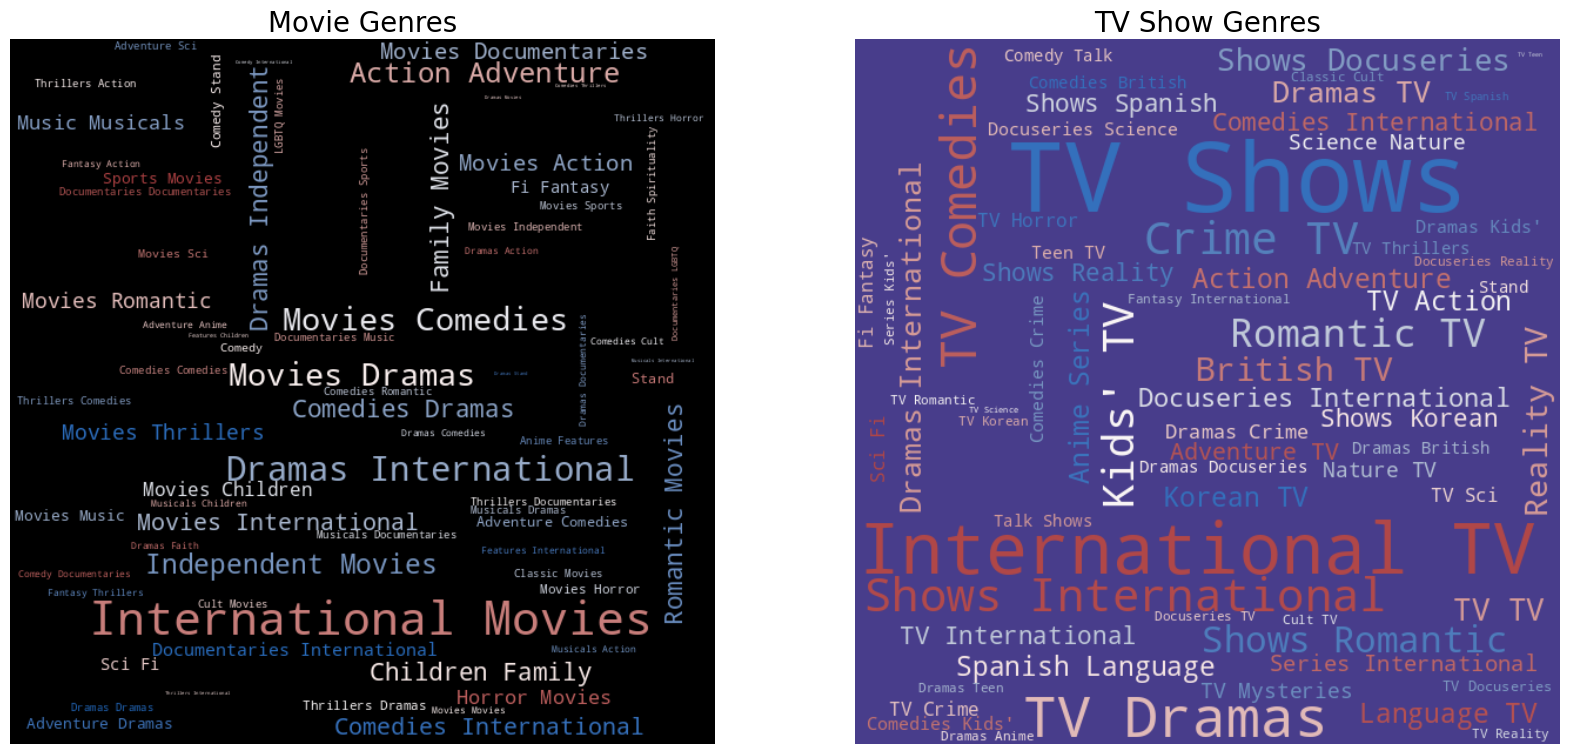

In [52]:
# Chart - 12 visualization code

from wordcloud import WordCloud

# Filter data for movies and TV shows
df_movies = df[df['type'] == 'Movie'].copy()
df_tv_shows = df[df['type'] == 'TV Show'].copy()

# Generate word cloud for movies
text_movies = ' '.join(df_movies['listed_in'])
wordcloud_movies = WordCloud(background_color='black', colormap='vlag', width=600, height=600, max_words=121).generate(text_movies)

# Generate word cloud for TV shows
text_tv_shows = ' '.join(df_tv_shows['listed_in'])
wordcloud_tv_shows = WordCloud(background_color='darkslateblue', colormap='vlag', width=600, height=600, max_words=121).generate(text_tv_shows)

# Plot side-by-side subplots
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Movie Genres', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('TV Show Genres', fontsize=20)
plt.axis('off')

plt.show()


In [53]:
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6,2020


In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. We  will convert values in these columns into integers for both the movies and shows datasets.

In [54]:
df_tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
df_tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
df_tv_shows.seasons = df_tv_shows.seasons.str.replace(' Seasons','').astype(int)
df_tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,7,2017
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",11,2018
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,5,2019
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2019-03-20,2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",3,2019


### Chart - 13

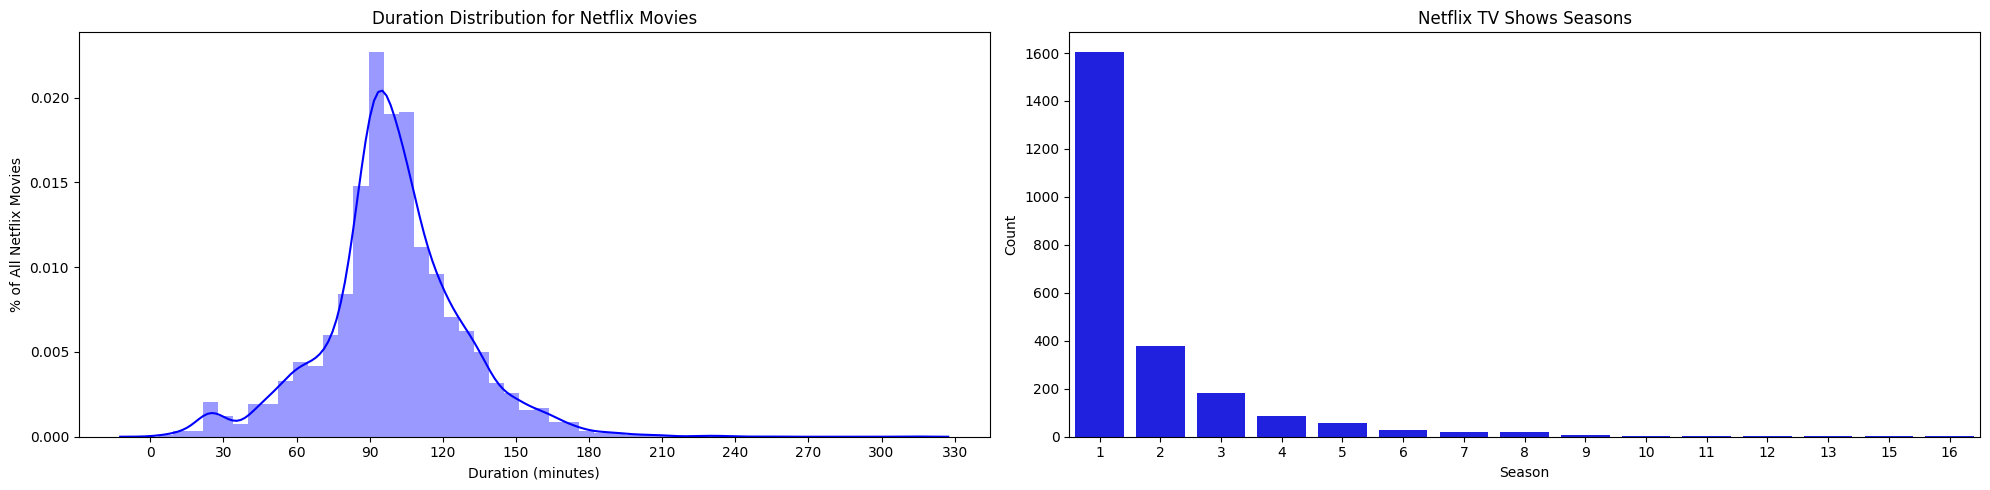

In [55]:
# Chart - 13 visualization code

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot duration distribution for Netflix movies
g1 = sns.distplot(df_movies.duration, color='blue', ax=ax[0])
g1.set_xticks(np.arange(0, 360, 30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")

# Plot count of Netflix TV shows by seasons
g2 = sns.barplot(x=df_tv_shows['seasons'].value_counts().index, y=df_tv_shows['seasons'].value_counts(), color='blue', ax=ax[1])
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")

plt.tight_layout()
plt.show()


In the left graph, we can see that the duration for netflix movies closely resembles a normal distribution with the average duration 90 minutes. Netflix TV shows seems to be heavily skewed to the right where the majority of shows only have 1 season.

### Chart - 14

([<matplotlib.patches.Wedge at 0x7ad75c559e40>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

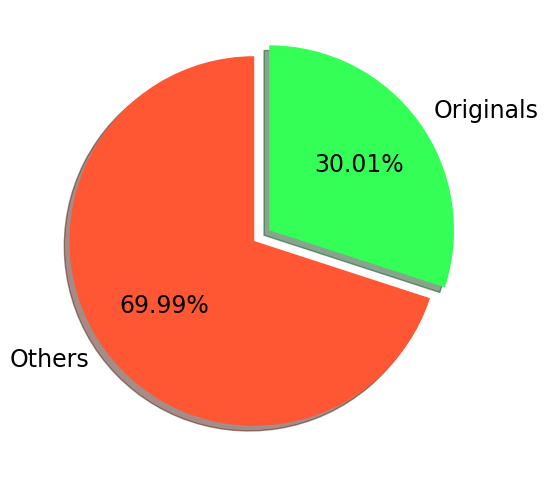

In [61]:
# Chart - 14 visualization code

df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year_added'], 'Yes', 'No')
# Pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(6,6))
explode = (0, 0.1)
ax.pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 17}, colors =['#FF5733','#33FF57'])



### Chart - 15

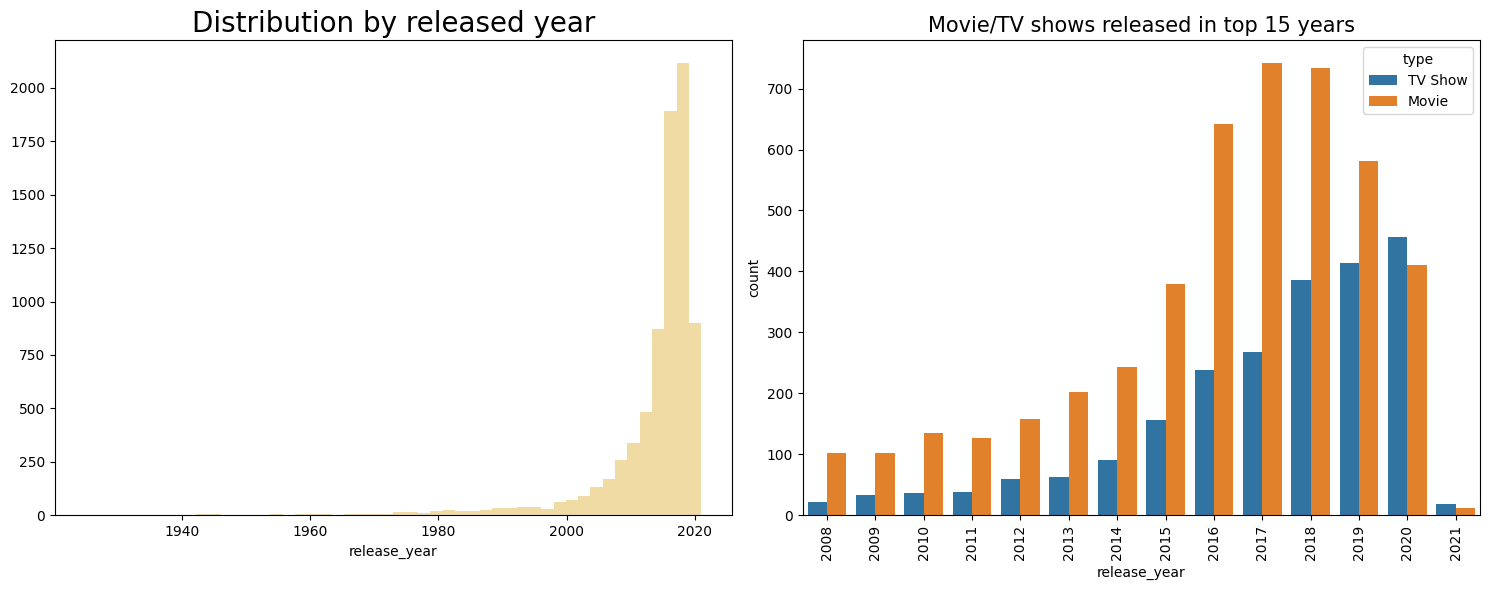

In [63]:
# Chart - 15 visualization code

# Sort DataFrame by release_year in ascending order
df_sorted = df.sort_values('release_year')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Univariate analysis - Distribution by released year
hist = sns.distplot(df_sorted['release_year'], ax=ax[0], kde=False, color='goldenrod')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis - Movie/TV shows released in top 15 years
count = sns.countplot(x="release_year", hue='type', data=df_sorted, order=range(2008, 2022), ax=ax[1])
count.set_title('Movie/TV shows released in top 15 years', size=15)
count.set_xticklabels(count.get_xticklabels(), rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
